## US Accidents exploratory data analysis 

In [8]:
pip install kaggle --quiet

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install opendatasets

In [ ]:
pip install folium

### Importing Needed Libraries

In [14]:
import os

In [15]:
import opendatasets as od

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import folium 
from folium.plugins import HeatMap

### Downloading Dataset fron Kaggle API 

In [35]:
dataset = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'

In [36]:
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  princeshah0


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents


100%|██████████| 653M/653M [07:20<00:00, 1.55MB/s] 


In [17]:
data_dir = r'.\us-accidents'

In [18]:
os.listdir(data_dir)

['US_Accidents_March23.csv']

## Data preparation and cleaning
- Load the file using Pandas
- Look at some informations about data & columns
- Fix any missing or incorrect values 

In [19]:
df= pd.read_csv ('US_Accidents_March23.csv')

In [20]:
df.head(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [21]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [22]:
len(df.columns)

46

In [23]:
len (df)

7728394

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [25]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [26]:
numerics = ['int16','int32', 'int64', 'float16', 'float32', 'float64']
numeric_Df = df.select_dtypes(include=numerics)
len(numeric_Df.columns)

13

#### chaking for Duplicates From Dataset

In [27]:
print("Number of duplictes:",df.duplicated().sum())


Number of duplictes: 0


In [28]:
df.isna().sum().sort_values(ascending =False)

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Traffic_Signal                 0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Turning_Loop                   0
No_Exit                        0
End_Time  

In [29]:
percentage_missing = df.isna().sum().sort_values(ascending =False) / len(df)
percentage_missing

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
Traffic_Signal           0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop                     0.000000e+00
Traffic_Calm

In [30]:
percentage_missing [percentage_missing != 0]

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
dtype: float64

#### Droping Unwanted Columns

In [31]:
columns_to_drop=['ID','Civil_Twilight','Nautical_Twilight', 'Astronomical_Twilight']
df= df.drop(columns= columns_to_drop, axis=1)

#### Data distribution by State 

In [32]:
df['State'].value_counts()

State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
AZ     170609
GA     169234
IL     168958
TN     167388
MI     162191
LA     149701
NJ     140719
MD     140417
OH     118115
WA     108221
AL     101044
UT      97079
CO      90885
OK      83647
MO      77323
CT      71005
IN      67224
MA      61996
WI      34688
KY      32254
NE      28870
MT      28496
IA      26307
AR      22780
NV      21665
KS      20992
DC      18630
RI      16971
MS      15181
DE      14097
WV      13793
ID      11376
NM      10325
NH      10213
WY       3757
ND       3487
ME       2698
VT        926
SD        289
Name: count, dtype: int64

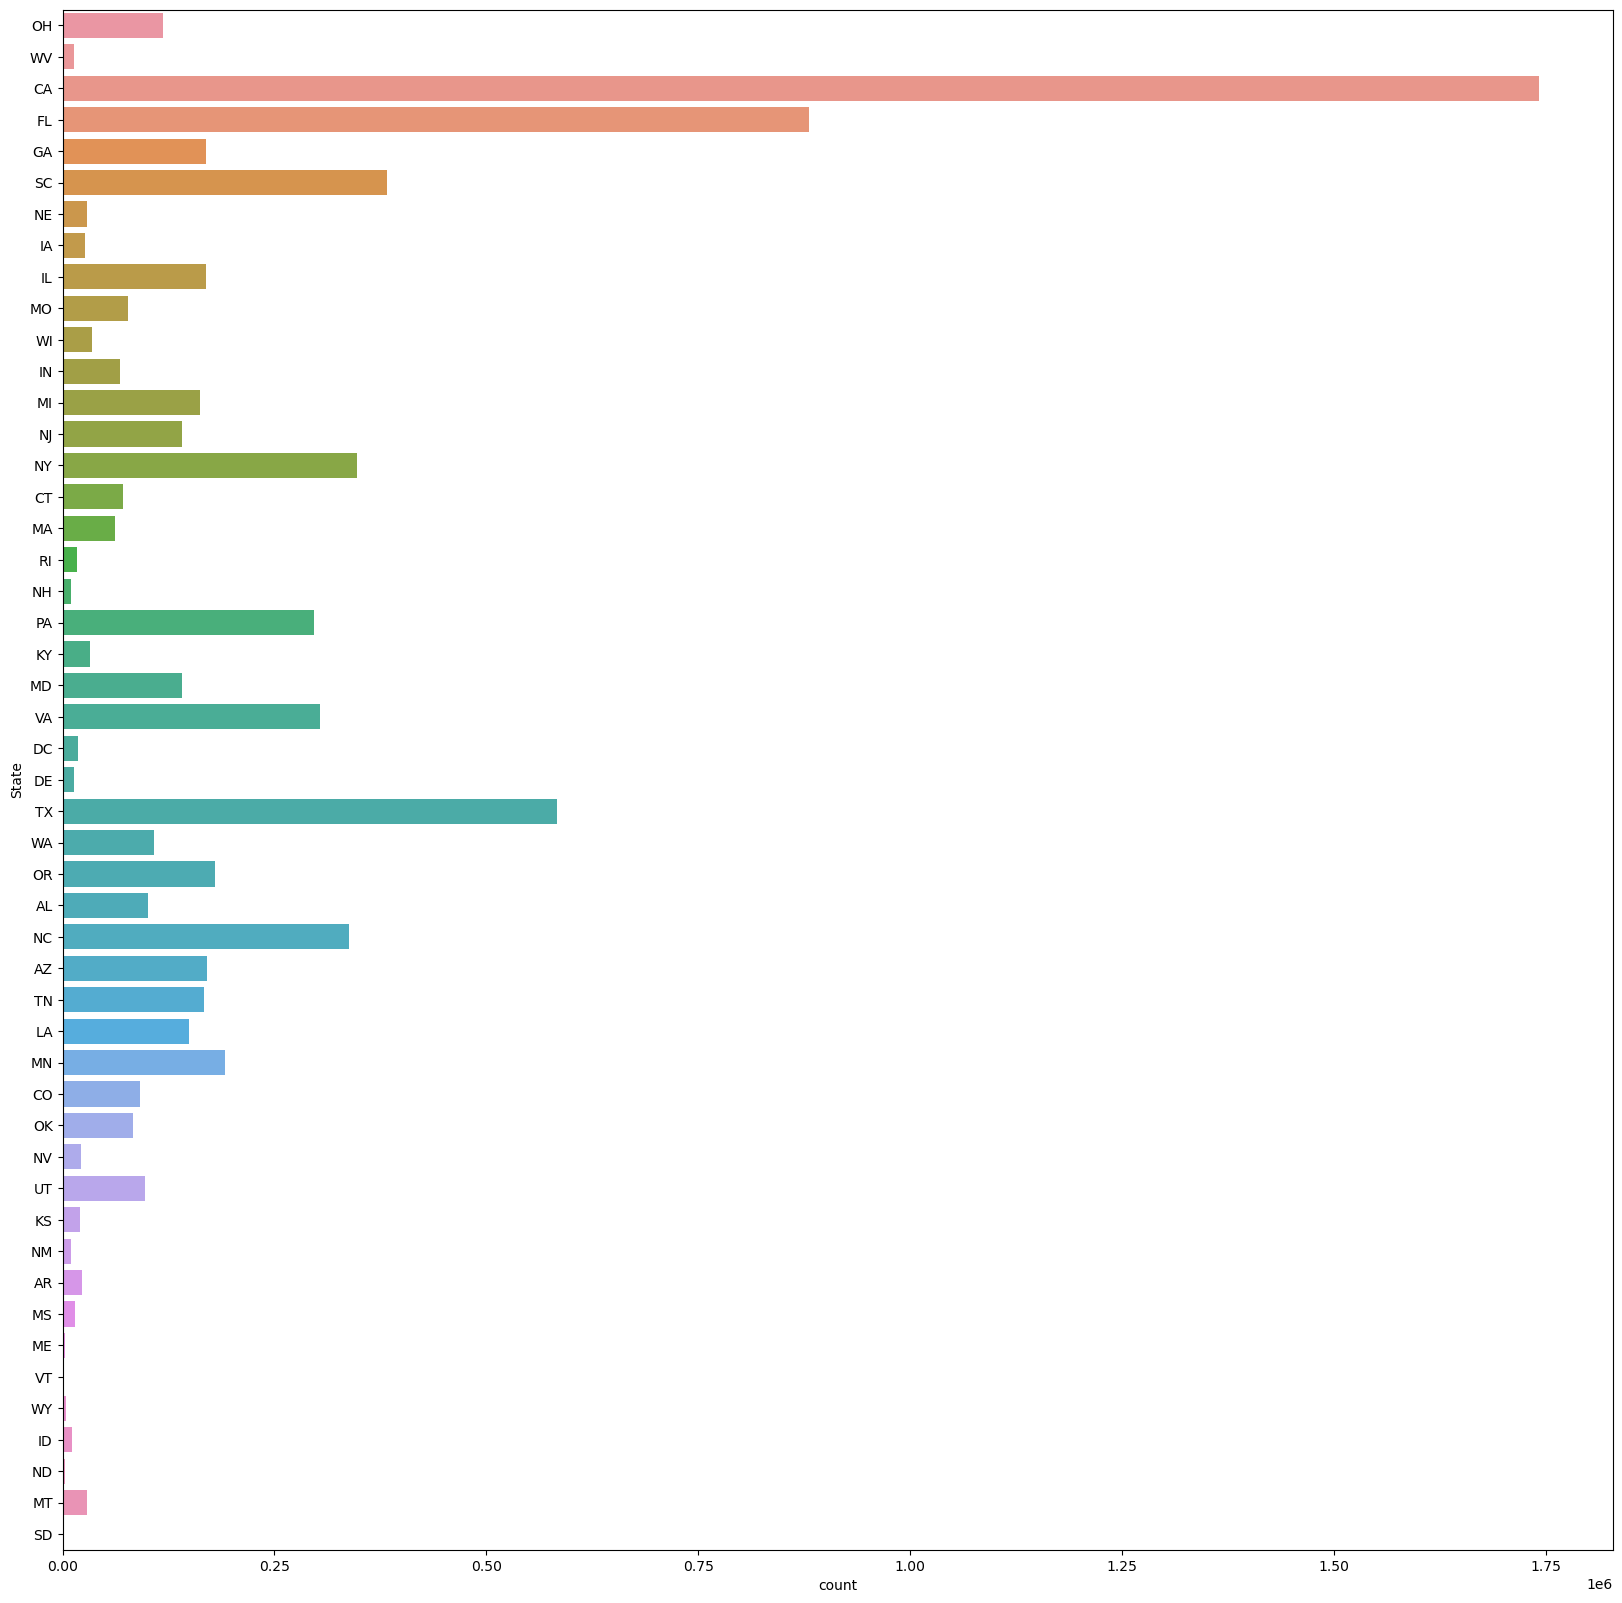

In [33]:
plt.figure(figsize = (20,20))
sns.countplot(y='State', data= df)
plt.show()

#### Missing values

<Axes: >

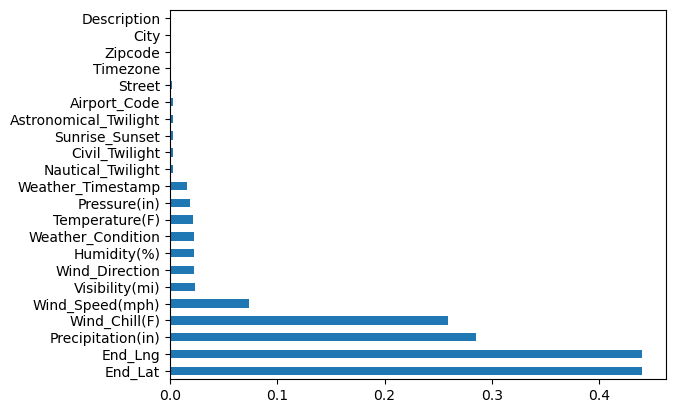

In [34]:
percentage_missing [percentage_missing != 0].plot(kind = 'barh')

## Columns to analyze
1. State
2. City
3. Start time
4. Start lat, Start lng
5. temperature
6. Wheather Condition

#### 10 State with Highest of Accidents 

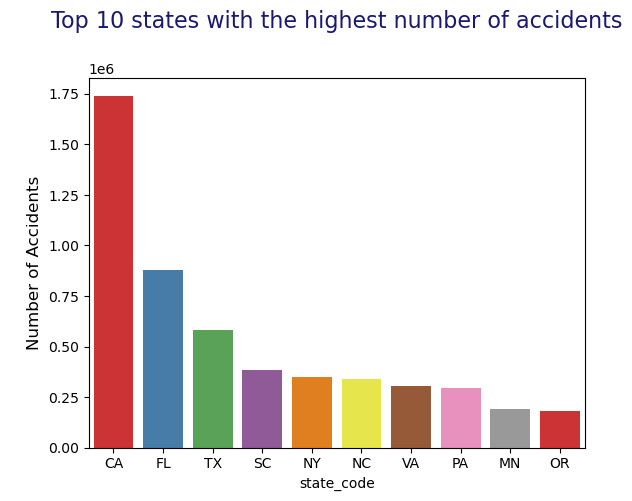

In [35]:
state_counts = df["State"].value_counts()
states = pd.DataFrame(state_counts).reset_index().sort_values('count', ascending=False)
states.rename(columns={'State':'state_code', 'count':'cases'}, inplace=True)
top_10 = states[:10]
sns.barplot(x=top_10['state_code'], y=top_10['cases'], palette='Set1')
plt.title("Top 10 states with the highest number of accidents\n", fontdict = {'fontsize':16, 'color':'MidnightBlue'})
plt.ylabel("\nNumber of Accidents", fontdict = {'fontsize':12, 'color':'black'})
plt.show()

#### 10 States with Lowest Number of Accidents

C:\Users\Prince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


NameError: name 'axs' is not defined

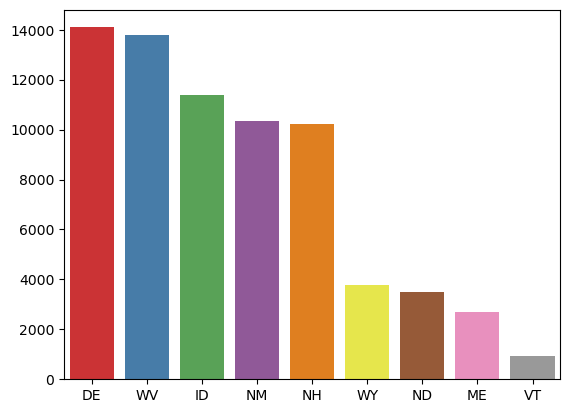

In [36]:

x = state_counts[-10:-1].index.to_list()
y = state_counts[-10:-1].values.flatten()

sns.barplot(x=x, y = y, palette='Set1')
axs.tick_params(axis = 'x')
axs.set_ylabel("Number of Accidents")
axs.set_xlabel("States")
plt.title("10 States with Lowest Number of Accidents")
plt.show()

#### Data Of Accidents by Cities 

In [37]:
df

,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,Right lane blocked due to accident on I-70 Eas...,...,False,False,False,False,False,False,False,False,False,Night
1,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,...,False,False,False,False,False,False,False,False,False,Night
2,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,Accident on OH-32 State Route 32 Westbound at ...,...,False,False,False,False,False,False,False,True,False,Night
3,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,Accident on I-75 Southbound at Exits 52 52B US...,...,False,False,False,False,False,False,False,False,False,Night
4,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,...,False,False,False,False,False,False,False,True,False,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,At Market St - Accident.,...,False,False,False,False,False,False,False,False,False,Day
7728390,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,False,False,False,Day
7728391,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,True,False,False,False,False,False,False,False,False,Day
7728392,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,False,False,False,Day


In [38]:
cities=df.City
len (cities)

7728394

In [39]:
cities_by_acci= df.City.value_counts()
cities_by_acci

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

In [40]:
'New York' in df.City

False

In [41]:
type(cities_by_acci)

pandas.core.series.Series

In [42]:
sns.set_style("darkgrid")

C:\Users\Prince\AppData\Local\Temp\ipykernel_13776\1382039500.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cities_by_acci)
C:\Users\Prince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Density'>

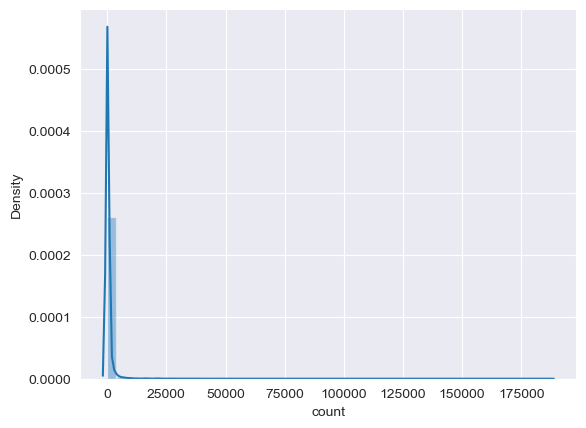

In [43]:
sns.distplot(cities_by_acci)

In [44]:
high_acci_cities = cities_by_acci[cities_by_acci > 1000]

In [45]:
len(high_acci_cities)/len(cities_by_acci)

0.08882877613686212

##### 88% of cities have high accidents 

In [46]:
high_acci_cities = df['City'].value_counts().reset_index().nlargest(20,'count')
high_acci_cities

,City,count
0,Miami,186917
1,Houston,169609
2,Los Angeles,156491
3,Charlotte,138652
4,Dallas,130939
5,Orlando,109733
6,Austin,97359
7,Raleigh,86079
8,Nashville,72930
9,Baton Rouge,71588


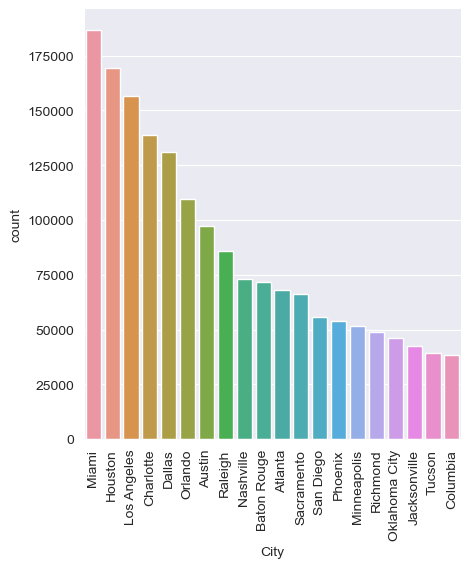

In [47]:
sns.catplot(kind='bar', data = high_acci_cities, x='City', y='count')
plt.xticks(rotation=90)
plt.show()

In [48]:
low_acci_cities = cities_by_acci[cities_by_acci < 1000]
low_acci_cities= df['City'].value_counts().reset_index().nsmallest(10,'count')
low_acci_cities

,City,count
12655,Lake Andes,1
12656,Catoctin,1
12657,Duck Hill,1
12658,Westbrookville,1
12659,Saint Croix,1
12660,Clarksdale,1
12661,Martindale,1
12662,Mazon,1
12663,Smackover,1
12664,Lublin,1


In [75]:
len(low_acci_cities)/len(cities_by_acci)

0.0007311010381634742

##### 73% of cities have low accidentsabs

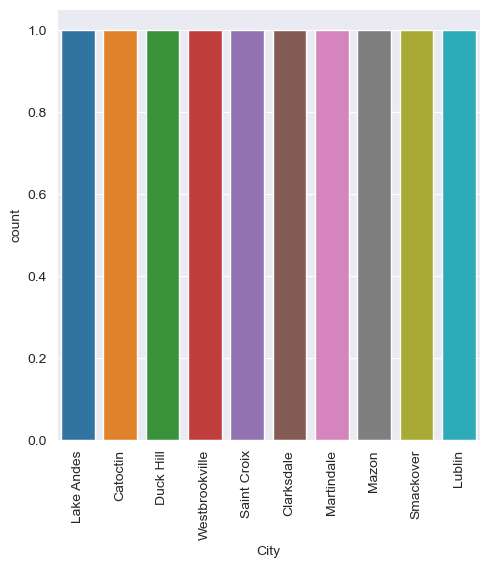

In [49]:
sns.catplot(kind='bar', data = low_acci_cities, x='City', y='count')
plt.xticks(rotation=90)
plt.show()

In [50]:
df.groupby('City').count()

,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
City,,,,,,,,,,,,,,,,,,,,,
Aaronsburg,21,21,21,21,21,21,16,16,21,21,...,21,21,21,21,21,21,21,21,21,21
Abbeville,604,604,604,604,604,604,238,238,604,604,...,604,604,604,604,604,604,604,604,604,604
Abbotsford,21,21,21,21,21,21,12,12,21,21,...,21,21,21,21,21,21,21,21,21,21
Abbott,33,33,33,33,33,33,0,0,33,33,...,33,33,33,33,33,33,33,33,33,33
Abbottstown,118,118,118,118,118,118,79,79,118,118,...,118,118,118,118,118,118,118,118,118,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zortman,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
Zumbro Falls,74,74,74,74,74,74,57,57,74,74,...,74,74,74,74,74,74,74,74,74,74
Zumbrota,538,538,538,538,538,538,435,435,538,538,...,538,538,538,538,538,538,538,538,538,538


#### Accidents Prone Streets 

In [51]:
street_df = pd.DataFrame(df['Street'].value_counts()).reset_index().rename(columns={'index':'Street No.', 'Street':'Cases'})

top_ten_streets_df = pd.DataFrame(street_df.head(10))

In [52]:
top_ten_streets_df

,Cases,count
0,I-95 N,78430
1,I-95 S,74528
2,I-5 N,71968
3,I-10 E,55572
4,I-10 W,53725
5,I-5 S,51781
6,I-80 W,39662
7,I-80 E,36113
8,I-405 N,32364
9,I-75 N,28166


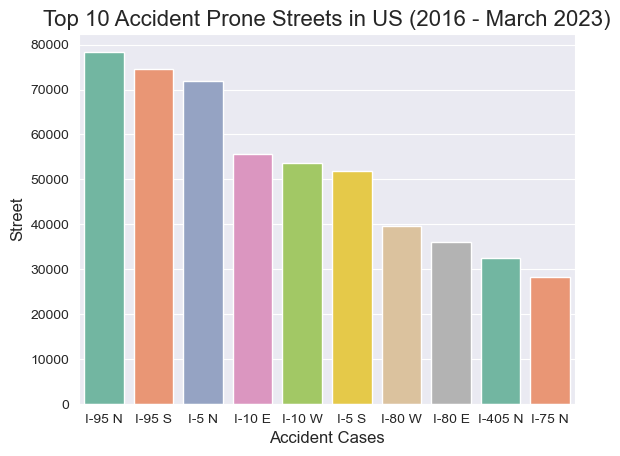

In [53]:
ax = sns.barplot(x='Cases', y='count', data=top_ten_streets_df, palette='Set2')

plt.title('Top 10 Accident Prone Streets in US (2016 - March 2023)', fontsize=16)
plt.xlabel('Accident Cases', fontsize=12)
plt.ylabel('Street', fontsize=12)
plt.show()

#### Accients According to Time 

In [54]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [55]:
df.Start_Time = pd.to_datetime(df.Start_Time, format= 'mixed')

In [56]:
df.Start_Time [0]

Timestamp('2016-02-08 05:46:00')

C:\Users\Prince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Density'>

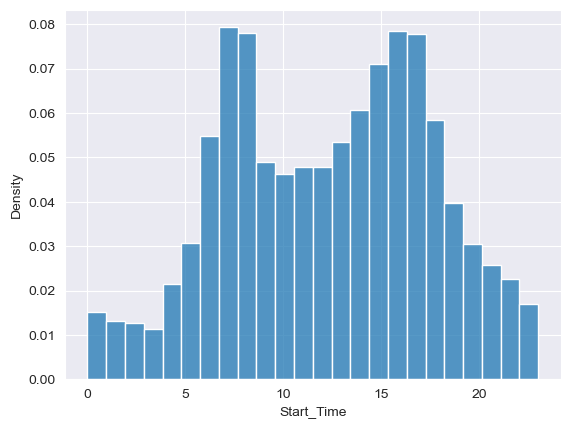

In [57]:
sns.histplot(df.Start_Time.dt.hour, bins=24, stat= 'density')

#### Peak timing of Accidents
- Around 7 and 8 in morning there is a most spike in accident which might be due to office hours, college time etc.- 
Next spike is Around 4 and 5 in evening which might be due to going back to home from office or Play hours for people


C:\Users\Prince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Density'>

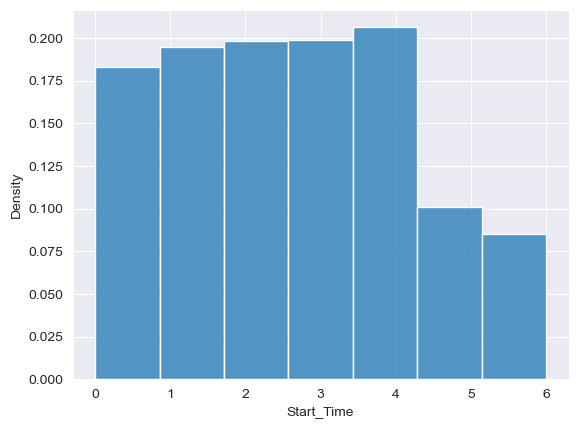

In [78]:
sns.histplot(df.Start_Time.dt.dayofweek, bins=7, stat= 'density')

C:\Users\Prince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Density'>

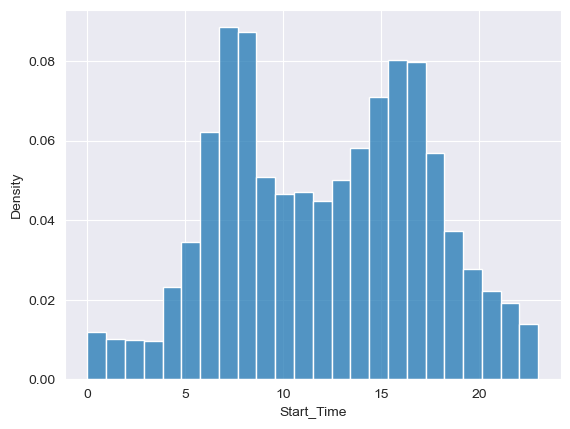

In [60]:
Monday=df.Start_Time[df.Start_Time.dt.dayofweek==0]
sns.histplot(Monday.dt.hour, bins=24, stat= 'density')

C:\Users\Prince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Density'>

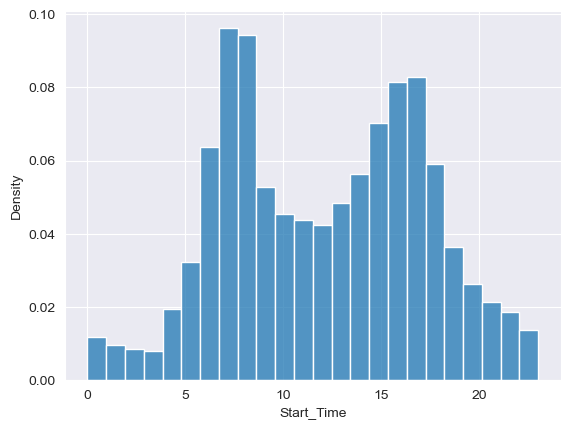

In [80]:
Tuesday=df.Start_Time[df.Start_Time.dt.dayofweek==1]
sns.histplot(Tuesday.dt.hour, bins=24, stat= 'density')

C:\Users\Prince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Density'>

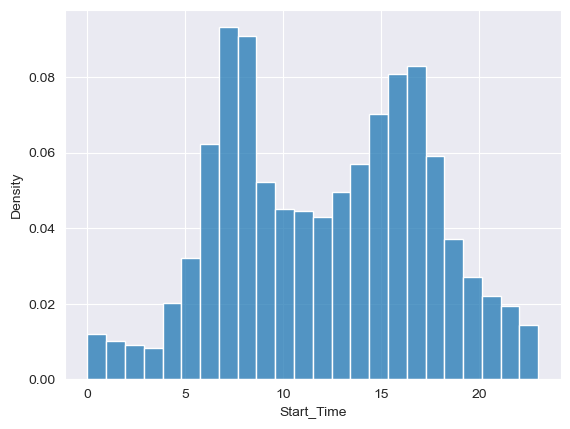

In [81]:
Wednesday=df.Start_Time[df.Start_Time.dt.dayofweek==2]
sns.histplot(Wednesday.dt.hour, bins=24, stat= 'density')

C:\Users\Prince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Density'>

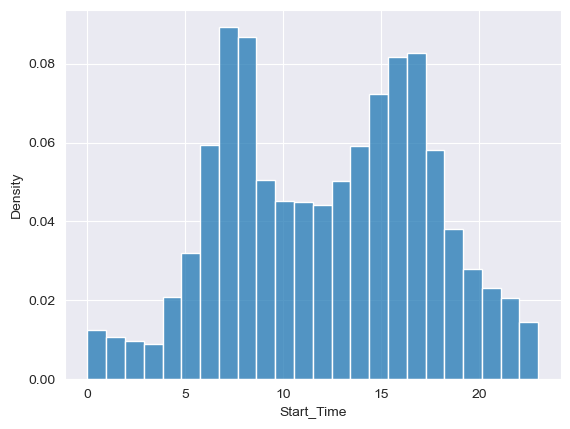

In [82]:
Thursday=df.Start_Time[df.Start_Time.dt.dayofweek==3]
sns.histplot(Thursday.dt.hour, bins=24, stat= 'density')

C:\Users\Prince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Density'>

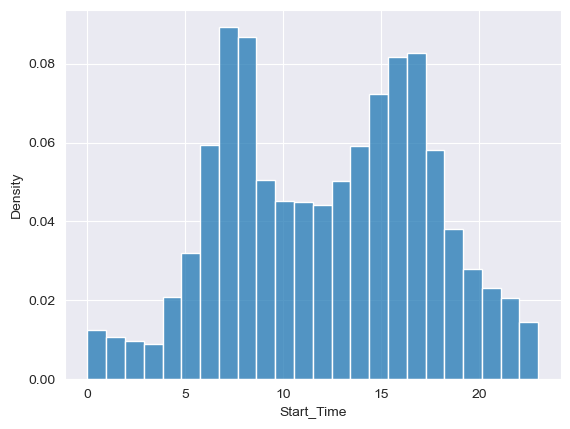

In [83]:
Friday=df.Start_Time[df.Start_Time.dt.dayofweek==3]
sns.histplot(Friday.dt.hour, bins=24, stat= 'density')

C:\Users\Prince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Density'>

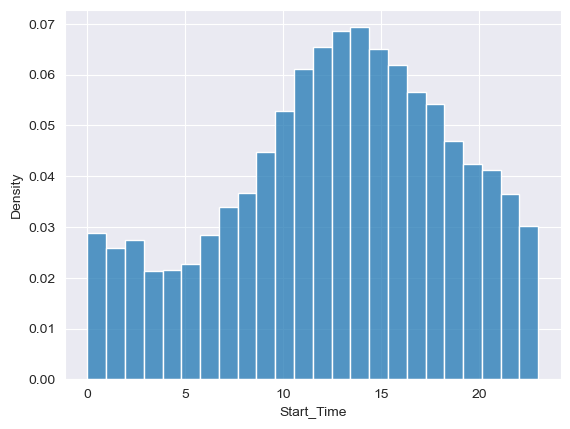

In [84]:
Saturday=df.Start_Time[df.Start_Time.dt.dayofweek==5]
sns.histplot(Saturday.dt.hour, bins=24, stat= 'density')

C:\Users\Prince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Density'>

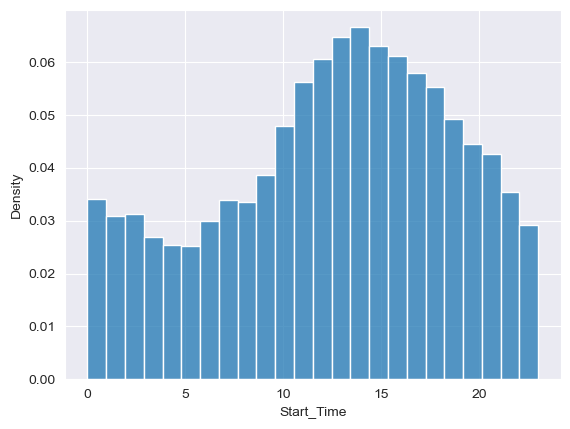

In [59]:
sunday=df.Start_Time[df.Start_Time.dt.dayofweek==6]
sns.histplot(sunday.dt.hour, bins=24, stat= 'density')

#### Trend of Accidents in Week 
- On workings i.e. monday, tuesday, wednesday, thurday, friday you'll find almost the same trend in accidents time.- 
While on saturday and sunday the is a different trend i.e. from 10 am to 7 pm the frequency of accident is more.

C:\Users\Prince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Density'>

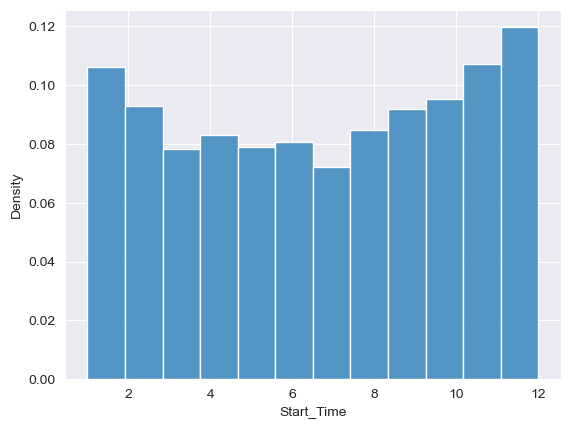

In [61]:
sns.histplot(df.Start_Time.dt.month, bins=12, stat= 'density')

#### It's seems during summer there are less accidents but as the winter starts the is a increasing trend in accidents.

In [62]:
df.Source

0          Source2
1          Source2
2          Source2
3          Source2
4          Source2
            ...   
7728389    Source1
7728390    Source1
7728391    Source1
7728392    Source1
7728393    Source1
Name: Source, Length: 7728394, dtype: object

#### Data By Source

<Axes: ylabel='count'>

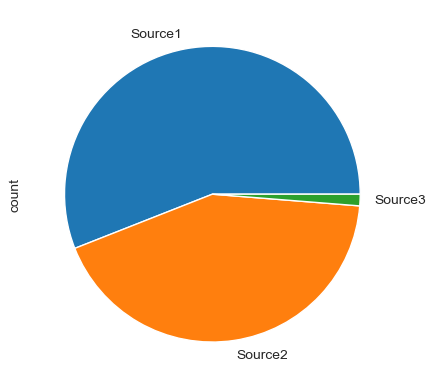

In [63]:
df.Source.value_counts().plot(kind='pie')

### Start Latitude & Longitude

In [65]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [66]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

In [67]:
sample_df = df.sample(int(0.1*len(df)))

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

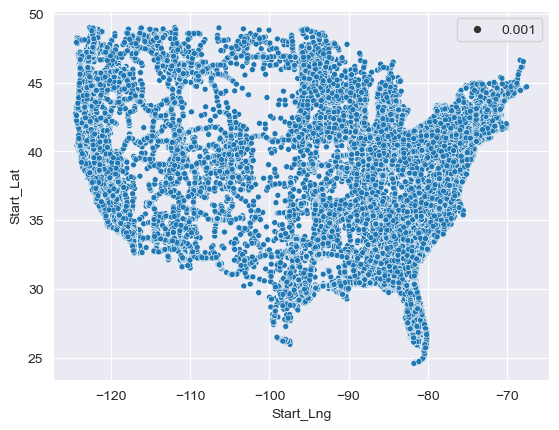

In [68]:
sns.scatterplot(x=sample_df.Start_Lng, y= df.Start_Lat, size = 0.001)

In [70]:
lat, lon= df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(39.865147, -84.058723)

In [71]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).items():
    print(x[1])

1588636    38.821480
4678345    25.839902
5723629    41.302339
1990931    38.877949
3181938    42.466160
             ...    
1035936    29.742439
5447504    33.772872
617345     34.173336
533309     25.958784
1242096    40.431961
Name: Start_Lat, Length: 100, dtype: float64
1588636    -91.138428
4678345    -80.315701
5723629    -72.911271
1990931    -77.269203
3181938    -88.017159
              ...    
1035936    -95.373871
5447504    -81.229495
617345    -118.535973
533309     -80.170494
1242096   -111.891411
Name: Start_Lng, Length: 100, dtype: float64


In [72]:
sample_df = df.sample(int(0.01*len(df)))
lat_lon_pairs = list(zip (list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [73]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

##### We took a sample of data (Because of lots of data which was creating overload), we can see Lot's people live near bay areas.

#### Accidents by Year

C:\Users\Prince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


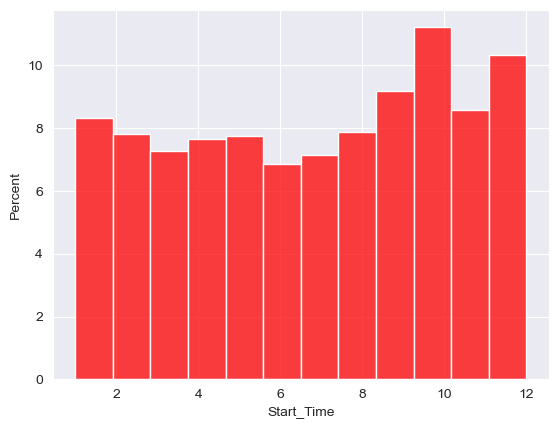

In [94]:
raw_df_2019 = df[df['Start_Time'].dt.year == 2019]
sns.histplot(raw_df_2019['Start_Time'].dt.month, color='red', bins=12, stat='percent');

C:\Users\Prince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


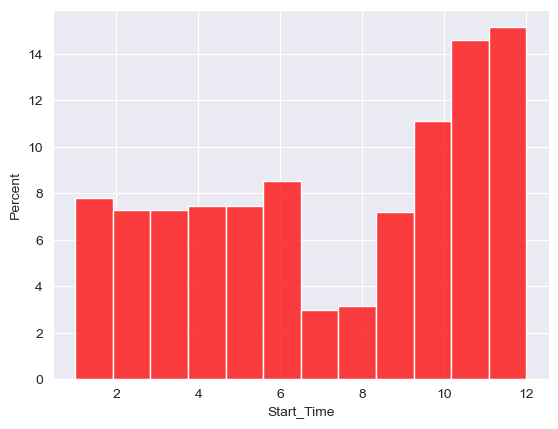

In [95]:
raw_df_2020 = df[df['Start_Time'].dt.year == 2020]
sns.histplot(raw_df_2020['Start_Time'].dt.month, color='red', bins=12, stat='percent');

C:\Users\Prince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


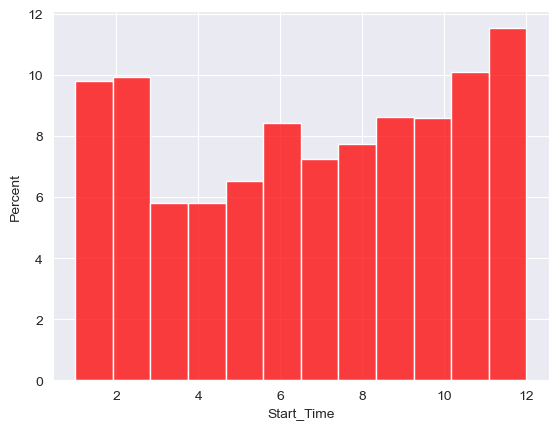

In [97]:
raw_df_2021 = df[df['Start_Time'].dt.year == 2021]
sns.histplot(raw_df_2021['Start_Time'].dt.month, color='red', bins=12, stat='percent');

C:\Users\Prince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


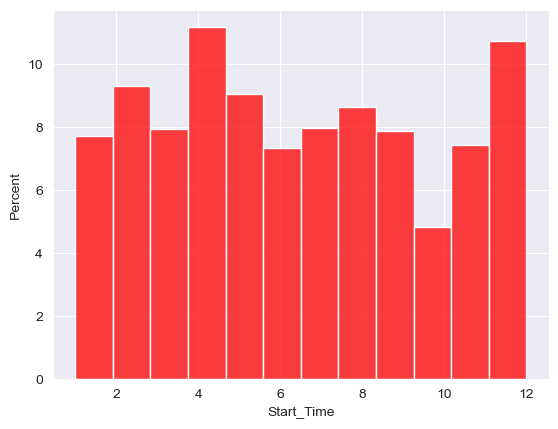

In [96]:
raw_df_2022 = df[df['Start_Time'].dt.year == 2022]
sns.histplot(raw_df_2022['Start_Time'].dt.month, color='red', bins=12, stat='percent');

#### Ask and Answer Questions
1. Are there more accidents in warmer or colder areas?
2. Which states have the highest number of accidents? How about per capita?
3. Among the top 100 cities in number of accidents, which states do they belong to most frequent?
4. What Time of the day are the accidents most frequent in?
5. Which days of the week have the most accidents?
6. Which months have the most accidents?
7. What is the trend of accidents year over year(decreasing/increasing)?
8. When is accidents per unit of traffic the highest.

highest.highest.

## Summary and Conclusion#### Summary:
- The cities with the highest reported accidents are Miami, Houston, Los Angeles, Charlotte, Dallas, Orlando, Austin, Raleigh, Nashville, Baton Rouge, Atlanta, Sacramento, San Diego, Phoenix, Minneapolis, Richmond, Oklahoma City, Jacksonville, Tucson, and Columbia.
- About 88% of cities experience a higher number of accidents.
- The majority of cities (73%) have a low number of accidents.
- Over 1023 cities reported just 1 accident, suggesting the presence of potential outliers that may need to be addressed.
- There is a notable spike in accidents around 7-8 AM, possibly correlated with morning rush hours and commuting to work or school.
- Another spike occurs around 4-5 PM, likely associated with evening rush hours and the return home from work or recreational activities.
- On weekdays (Monday to Friday), the trend in accident times is consistent.
- On weekends (Saturday and Sunday), there is a different trend, with a higher frequency of accidents between 10 AM and 7 PM.
- There is a seasonal variation in accidents, with fewer incidents during the summer and an increasing trend as winter approaches.
- The use of Folium indicates that many people live near bay areas.


eas.end, with a highe

## Conclusion:

The analysis suggests that certain cities, times of day, days of the week, and seasons are associated with higher accident frequencies. Outliers in the dataset, particularly cities reporting only one accident, may impact the overall analysis and should be considered for removal. Further exploration of the dataset and additional analysis could yield more insights and help in understanding the factors contributing to accidents in different locations and times. Additionally, the use of geographical data through Folium provides a visualization of the distribution of accidents near bay areas.